In [ ]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("ColabSpark").getOrCreate()

print(spark)


In [3]:
import random
import pandas as pd

def generate_patient_data(n=10000):
    data = []
    for i in range(n):
        patient = {
            "patient_id": i+1,
            "age": random.randint(18, 90),
            "gender": random.choice(["Male", "Female"]),
            "bp": f"{random.randint(90, 160)}/{random.randint(60, 100)}",
            "sugar": random.randint(70, 180),
            "cholesterol": random.randint(125, 250),
            "haemoglobin": round(random.uniform(12, 18), 1),
            "bmi": round(random.uniform(18, 35), 1)
        }
        data.append(patient)

    return pd.DataFrame(data)

df = generate_patient_data(10000)
df.to_csv("patients.csv", index=False)
print("10,000 patient profiles generated!")


10,000 patient profiles generated!


In [4]:
df_spark = spark.read.csv("patients.csv", header=True, inferSchema=True)
df_spark.show(5)


+----------+---+------+------+-----+-----------+-----------+----+
|patient_id|age|gender|    bp|sugar|cholesterol|haemoglobin| bmi|
+----------+---+------+------+-----+-----------+-----------+----+
|         1| 38|  Male| 92/63|  103|        127|       12.6|30.5|
|         2| 88|Female|142/61|  109|        169|       16.3|29.9|
|         3| 89|  Male|100/66|  133|        159|       13.0|19.2|
|         4| 54|  Male|119/69|   95|        167|       13.4|29.1|
|         5| 61|  Male|151/65|   76|        241|       13.1|22.4|
+----------+---+------+------+-----+-----------+-----------+----+
only showing top 5 rows



In [ ]:
df_spark.createOrReplaceTempView("patients")

#Average BP,Sugar, Cholesterol, and Hemoglobin
spark.sql("""
    SELECT
        AVG(bp) AS avg_bp,
        AVG(sugar) AS avg_sugar,
        AVG(cholesterol) AS avg_cholesterol,
        AVG(haemoglobin) AS avg_haemoglobin
    FROM patients
""").show()


+------+---------+---------------+------------------+
|avg_bp|avg_sugar|avg_cholesterol|   avg_haemoglobin|
+------+---------+---------------+------------------+
|  NULL| 125.3859|       187.4689|15.003909999999946|
+------+---------+---------------+------------------+



In [5]:
df_spark.describe().show()

+-------+------------------+------------------+------+-------+------------------+------------------+------------------+------------------+
|summary|        patient_id|               age|gender|     bp|             sugar|       cholesterol|       haemoglobin|               bmi|
+-------+------------------+------------------+------+-------+------------------+------------------+------------------+------------------+
|  count|             10000|             10000| 10000|  10000|             10000|             10000|             10000|             10000|
|   mean|            5000.5|           54.2708|  NULL|   NULL|          125.0682|          187.3663|15.027950000000029|26.412850000000024|
| stddev|2886.8956799071675|21.155401732471184|  NULL|   NULL|31.890406842259836|36.532084304462586|1.7269018549129136|  4.89953226534349|
|    min|                 1|                18|Female|100/100|                70|               125|              12.0|              18.0|
|    max|             10000

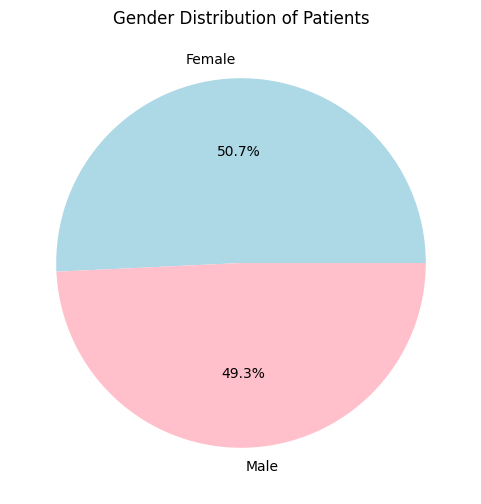

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Convert Spark DataFrame to Pandas
df_pandas = df_spark.toPandas()

#Group by Gender
gender_counts = df_pandas['gender'].value_counts()

#Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Gender Distribution of Patients")
plt.show()




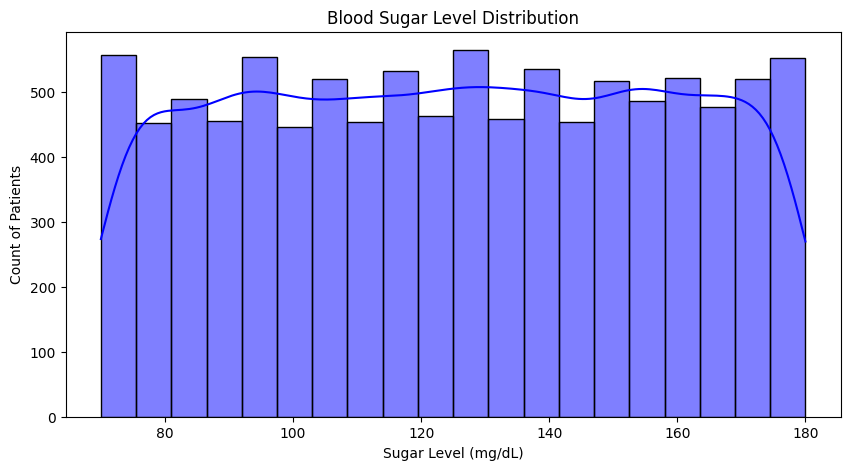

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_pandas["sugar"], bins=20, kde=True, color="blue")
plt.title("Blood Sugar Level Distribution")
plt.xlabel("Sugar Level (mg/dL)")
plt.ylabel("Count of Patients")
plt.show()


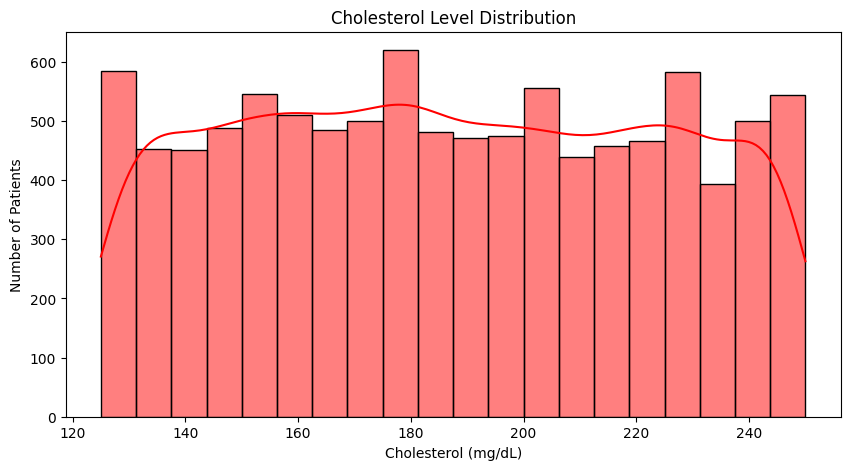

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_pandas["cholesterol"], bins=20, kde=True, color="red")
plt.title("Cholesterol Level Distribution")
plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Number of Patients")
plt.show()


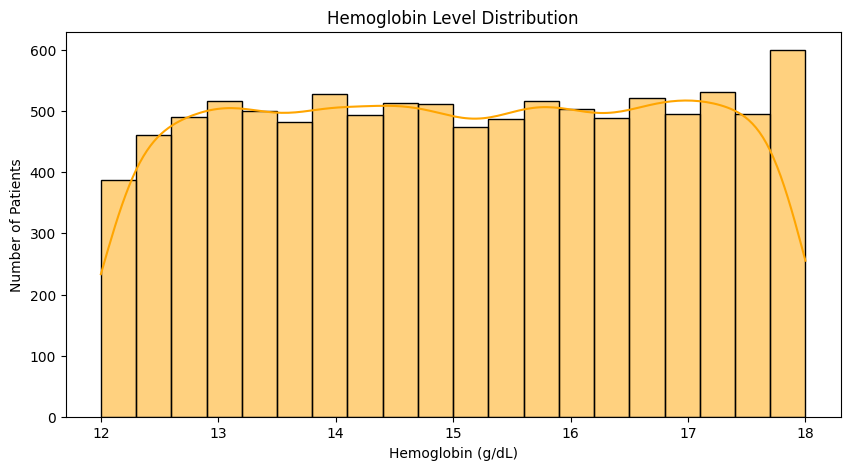

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df_pandas["haemoglobin"], bins=20, kde=True, color="orange")
plt.title("Hemoglobin Level Distribution")
plt.xlabel("Hemoglobin (g/dL)")
plt.ylabel("Number of Patients")
plt.show()


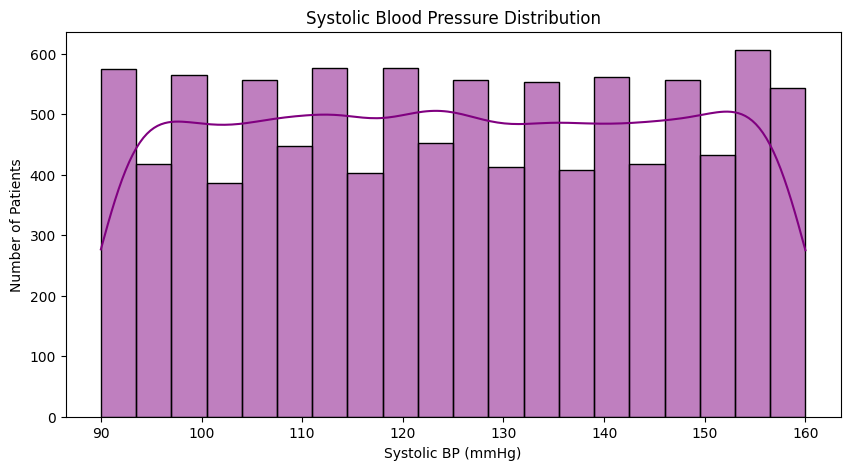

In [12]:
# Convert BP from "120/80" format into separate numeric columns
df_pandas[['systolic', 'diastolic']] = df_pandas['bp'].str.split('/', expand=True).astype(int)

#Systolic BP Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_pandas["systolic"], bins=20, kde=True, color="purple")
plt.title("Systolic Blood Pressure Distribution")
plt.xlabel("Systolic BP (mmHg)")
plt.ylabel("Number of Patients")
plt.show()


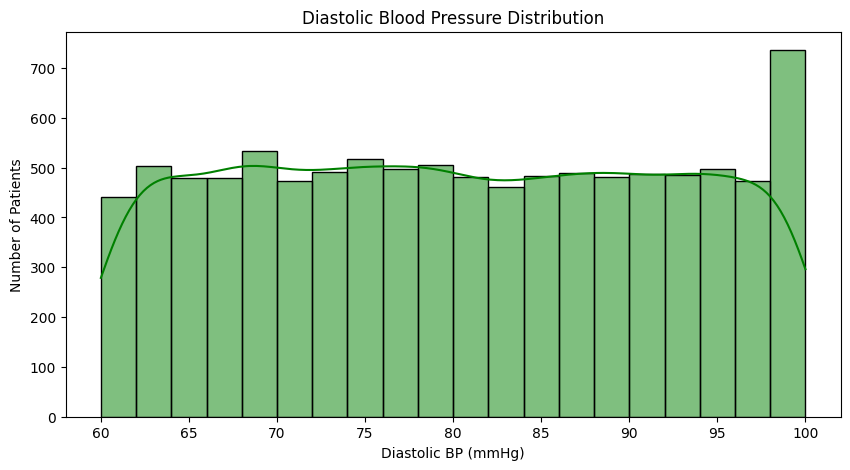

In [13]:
#Diastolic BP Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_pandas["diastolic"], bins=20, kde=True, color="green")
plt.title("Diastolic Blood Pressure Distribution")
plt.xlabel("Diastolic BP (mmHg)")
plt.ylabel("Number of Patients")
plt.show()


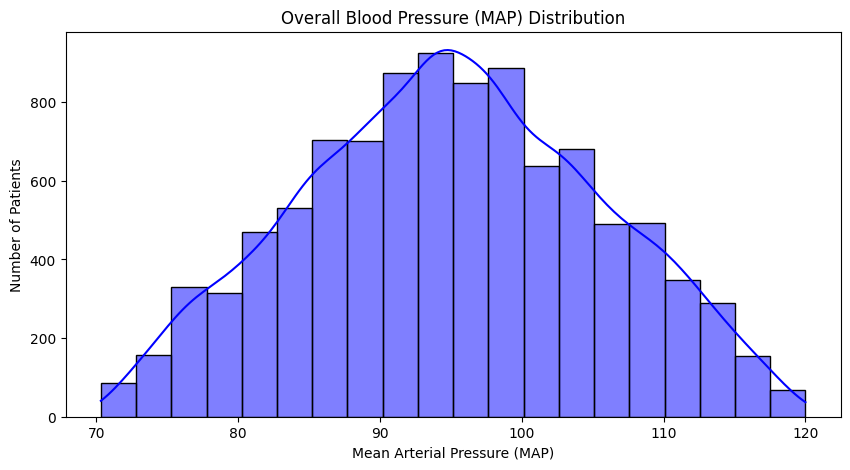

In [14]:
#Calculate Mean Arterial Pressure
df_pandas["MAP"] = (df_pandas["systolic"] + (2 * df_pandas["diastolic"])) / 3

#Overall BP
plt.figure(figsize=(10, 5))
sns.histplot(df_pandas["MAP"], bins=20, kde=True, color="blue")
plt.title("Overall Blood Pressure (MAP) Distribution")
plt.xlabel("Mean Arterial Pressure (MAP)")
plt.ylabel("Number of Patients")
plt.show()


In [ ]:
# Group by age and calculate the average BMI
bmi_trend = df_pandas.groupby("age")["bmi"].mean().reset_index()


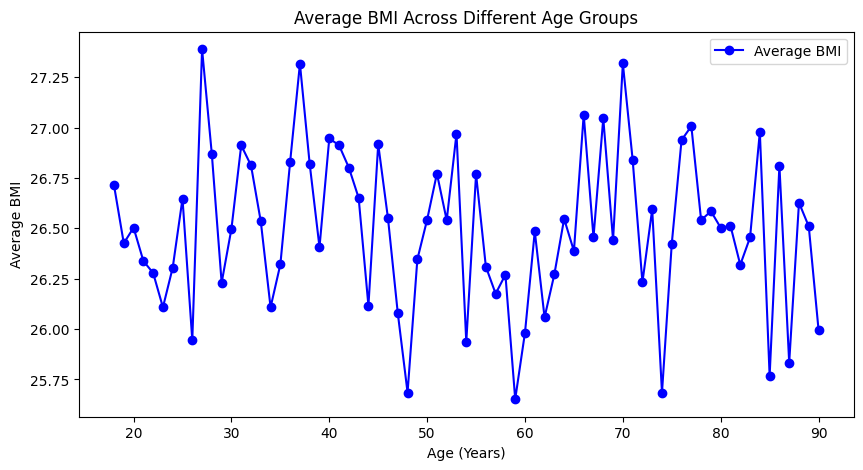

In [ ]:
plt.figure(figsize=(10, 5))

#Line Plot
plt.plot(bmi_trend["age"], bmi_trend["bmi"], marker='o', linestyle='-', color="blue", label="Average BMI")

# Labels and Title
plt.xlabel("Age (Years)")
plt.ylabel("Average BMI")
plt.title("Average BMI Across Different Age Groups")
plt.legend()


plt.show()
